# SENTIMENT ANALYSIS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

We will define and categorize the view on a text.

We will examine the attitude of the writer about the film.

We will get this data from IMDB review.

## Import Dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz",
                                                      num_words = None,
                                                      skip_top = 0,
                                                      maxlen = None,
                                                      seed = 113,
                                                      start_char = 1,
                                                      oov_char = 2,
                                                      index_from = 3)

In [4]:
print("type of X_train: ", type(X_train))
print("X train shape: ", X_train.shape)
print("Y train shape: ", Y_train.shape)

type of X_train:  <class 'numpy.ndarray'>
X train shape:  (25000,)
Y train shape:  (25000,)


## EDA

In [5]:
print("Y_train values : ", np.unique(Y_train))
print("Y_test values : ", np.unique(Y_test))

Y_train values :  [0 1]
Y_test values :  [0 1]


There are 2 classes

In [6]:
unique, counts = np.unique(Y_train, return_counts = True)
print("Y_train distribution: ",dict(zip(unique, counts)))

Y_train distribution:  {0: 12500, 1: 12500}


In [7]:
unique, counts = np.unique(Y_test, return_counts = True)
print("Y_test distribution: ",dict(zip(unique, counts)))

Y_test distribution:  {0: 12500, 1: 12500}


100% balanced data set

Text(0.5, 1.0, 'Y_train')

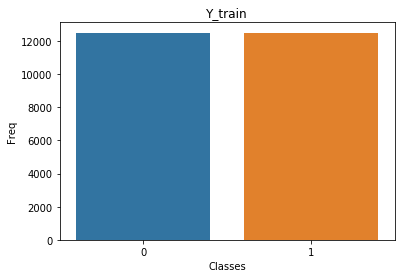

In [8]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y_train")

Text(0.5, 1.0, 'Y_train')

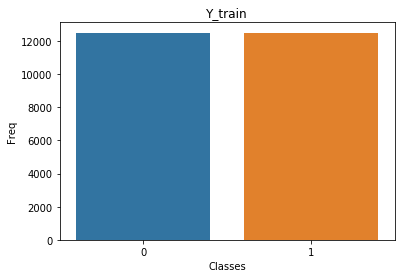

In [9]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y_train")

In [10]:
print(X_train[0])
len(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


218

In [11]:
review_len_train = []
review_len_test = []

for i, ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

Let's look at the distribution of words. Is there any skewness situation?

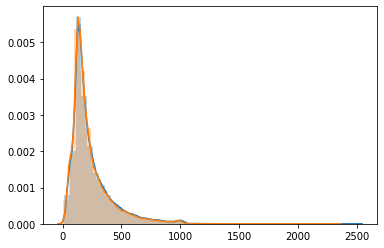

In [12]:
#%matplotlib inline
sns.distplot(review_len_train, hist_kws = {"alpha": 0.3})
sns.distplot(review_len_test, hist_kws = {"alpha": 0.3})

In [13]:
print("X_train mean ", np.mean(review_len_train))
print("X_train median ", np.median(review_len_train))
print("X_train mode ", stats.mode(review_len_train))

X_train mean  238.71364
X_train median  178.0
X_train mode  ModeResult(mode=array([132]), count=array([196]))


We are find mode value 132.

The input parameters I will use in NN have to be fix. But doesn't seem fix now. We understand that when we look at the graph. One's use 2500 words another one use 11 words. We have to pick a specify value for fix issue and we have to bring it to that size.

We can use a value between 130 and 150 to fix.

### Number of Words

In [14]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

<class 'dict'>
88584


Let's find out which word is according to the given number.

In [15]:
for keys, values in word_index.items():
    if values == 110:
        print(keys)

life


In [16]:
def whatItSay(index = 24):
    
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay()

! the original demille movie was made in 1938 with frederic march a very good film indeed hollywood's love of remakes brings us a fairly interesting movie starring yul brynner he of course was brilliant as he almost always seemed to be in all of his movies charlton heston as andrew jackson was a stroke of genius however the movie did tend to get a little long in places it does not move at the pace of the 1938 version still it is a fun movie that should be seen at least once
1


In [17]:
decoded_review = whatItSay(25)

! this is a very light headed comedy about a wonderful family that has a son called pecker because he use to peck at his food pecker loves to take all kinds of pictures of the people in a small suburb of baltimore md and manages to get the attention of a group of photo art lovers from new york city pecker has a cute sister who goes simply nuts over sugar and is actually an addict taking spoonfuls of sugar from a bag there are scenes of men showing off the lumps in their jockey's with grinding movements and gals doing pretty much the same it is rather hard to keep your mind out of the gutter with this film but who cares it is only a film to give you a few laughs at a simple picture made in 1998
1


25 index received a good movie review.

Let's look some example;

In [18]:
decoded_review = whatItSay(2500)

! i had never heard of this flick despite the connection to george clooney whose company produced and he appears in a very funny supporting bit and his ocean's 11 director steven soderbergh worse we picked this up in a discount bin for 4 99 canadian dollars at that what a grand and pleasant surprise but then i'm of the opinion that if william h macy is in it you can't be disappointed this was very reminiscent of those ealing comedies from england in the 1950s ok with more profanity this is an oddball and at times gut splittingly funny film the actual heist made me laugh so hard i was crying perhaps the funniest use of underpants in movie history maybe it was the low expectations i had going in but i watched with a group of people and we had a blast best 5 i've spent in ages
1


In [19]:
decoded_review = whatItSay(14)

! b movie at best sound effects are pretty good lame concept decent execution i suppose it's a rental br br you put some olive oil in your mouth to save you from de poison den you cut de bite and suck out de poisen you gonna be ok tommy br br you stay by the airphone when agent harris calls you get me give me a fire extinguisher br br weapons we need weapons where's the silverware all we have is this sporks br br dr price is the snake expert br br local ers can handle the occasional snakebite alert every er in the tri city area
0


14 index received a good movie review.

## Preprocess

There are 2 way we can do to train the data.

We have 88584 words, lets restrict them to 15000.

In [20]:
num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words)

In [21]:
maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [22]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


0 values were added to complete 130.

In [23]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


We can see every value fix to 0.

In [24]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


## Recurrent Neural Network 

In [25]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Let's Training;

In [26]:
history = rnn.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5, batch_size = 128, verbose = 1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 330us/step - loss: 0.6254 - accuracy: 0.6524 - val_loss: 0.7267 - val_accuracy: 0.6931
Epoch 2/5
25000/25000 [==============================] - 8s 322us/step - loss: 0.4612 - accuracy: 0.8273 - val_loss: 0.4056 - val_accuracy: 0.8260
Epoch 3/5
25000/25000 [==============================] - 7s 292us/step - loss: 0.3162 - accuracy: 0.8733 - val_loss: 0.4418 - val_accuracy: 0.8124
Epoch 4/5
25000/25000 [==============================] - 8s 315us/step - loss: 0.2614 - accuracy: 0.8986 - val_loss: 0.3611 - val_accuracy: 0.8400
Epoch 5/5
25000/25000 [==============================] - 8s 305us/step - loss: 0.2113 - accuracy: 0.9182 - val_loss: 0.3553 - val_accuracy: 0.8557


## Results

In [27]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy: % ",score[1]*100)

25000/25000 [==============================] - 4s 166us/step
Accuracy: %  85.57199835777283


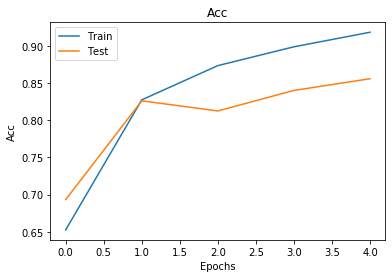

In [30]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

We got the best value in 1st epoch.

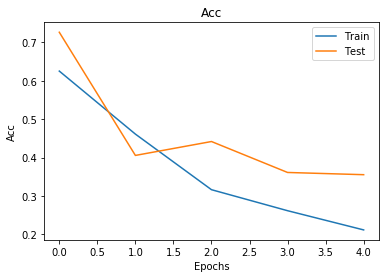

In [31]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

My train epoch decreases as loss increases.